In [1]:
# Downloaded 2 CSV Files
# train file — contains personal records of the passengers that would be used to build the machine learning model.
# test file — contains personal records for the remaining one-third (~4300) of the passengers, but not the target variable (i.e. the value of Transported for the passengers). It will be used to see how well our model performs on unseen data.


In [58]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [6]:
test_df.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  

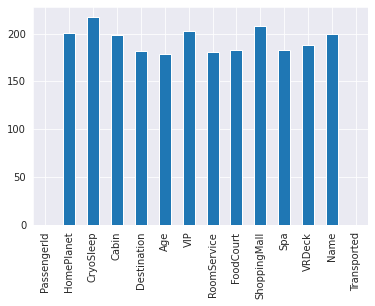

In [7]:
train_df.isnull().sum().plot.bar()
plt.show()

In [8]:
round(train_df.isnull().sum()*100/len(train_df),2).sort_values(ascending=False)

CryoSleep       2.50
ShoppingMall    2.39
VIP             2.34
HomePlanet      2.31
Name            2.30
Cabin           2.29
VRDeck          2.16
FoodCourt       2.11
Spa             2.11
Destination     2.09
RoomService     2.08
Age             2.06
PassengerId     0.00
Transported     0.00
dtype: float64

In [9]:
round(test_df.isnull().sum()*100/len(test_df),2).sort_values(ascending=False)

FoodCourt       2.48
Spa             2.36
Cabin           2.34
ShoppingMall    2.29
Name            2.20
CryoSleep       2.17
VIP             2.17
Destination     2.15
Age             2.13
HomePlanet      2.03
RoomService     1.92
VRDeck          1.87
PassengerId     0.00
dtype: float64

# Handling missing values/Feature Engineering

In [10]:
imputer = SimpleImputer(strategy='median')

train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = imputer.fit_transform(train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = imputer.fit_transform(test_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

imputer = SimpleImputer(strategy='most_frequent')

train_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']] = imputer.fit_transform(train_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']])
test_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']] = imputer.fit_transform(test_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']])

In [11]:
train_df.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [12]:
# view columns of the test data
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [13]:
# print datatypes of the train data
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [14]:
# Print shape of train data
print("The shape of the train dataset is: ", train_df.shape)

# Print shape of test data
print("The shape of the test dataset is: ", test_df.shape)

The shape of the train dataset is:  (8693, 14)
The shape of the test dataset is:  (4277, 13)


In [15]:
# Normalize is set to true to print proportions instead of number
train_df['Transported'].value_counts(normalize = True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

## Visualizing the data

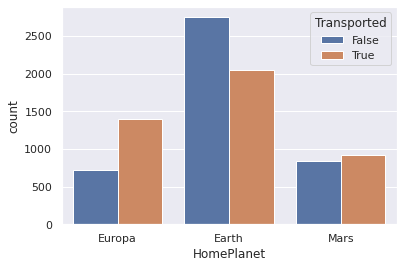

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(data=train_df, x='HomePlanet', hue='Transported')
plt.show()

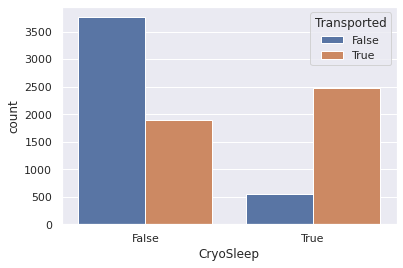

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(data=train_df, x='CryoSleep', hue='Transported')
plt.show()

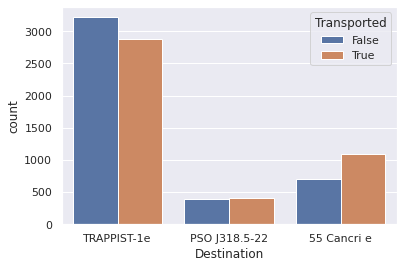

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(data=train_df, x='Destination', hue='Transported')
plt.show()

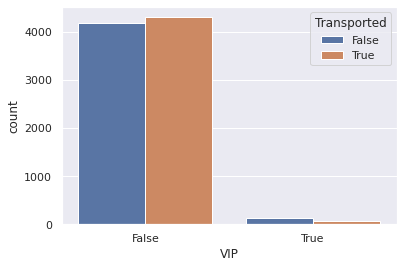

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(data=train_df, x='VIP', hue='Transported')
plt.show()

/home/aartidarji/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


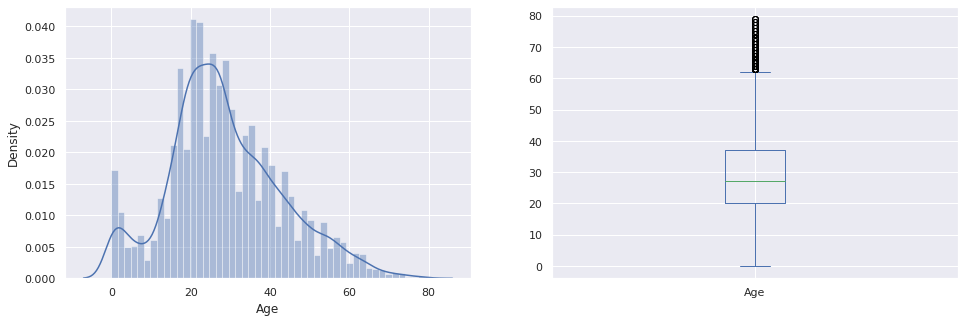

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Age']);
plt.subplot(122)
train_df['Age'].plot.box(figsize = (16, 5));
plt.show()

/home/aartidarji/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


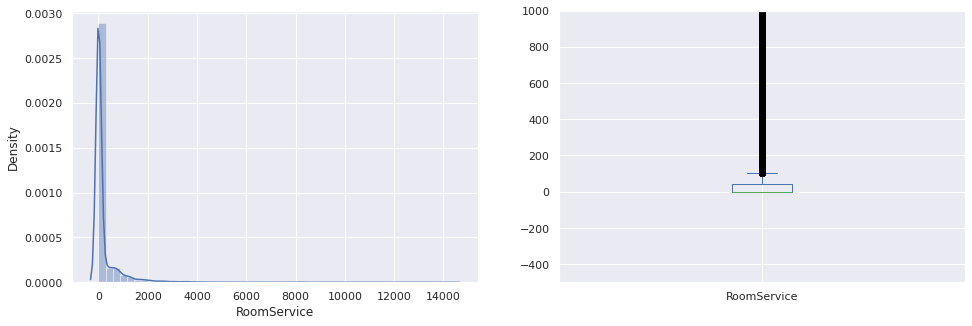

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['RoomService']);
plt.subplot(122)
train_df['RoomService'].plot.box(figsize = (16, 5));
plt.ylim([-500, 1000])
plt.show()

We can see that most of the data in the distribution of RoomService are towards the left, which means it is not normally distributed, and there are a lot of outliers. We will try to make it normal later.


In [22]:
#Cleaning up some more data

In [23]:
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
train_df.drop('Cabin', axis=1, inplace=True)

In [24]:

test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [25]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [26]:
train_df[['HomePlanet', 'Destination', 'Side', 'Deck']] = train_df[['HomePlanet', 'Destination', 'Side', 'Deck']].astype('category')
train_df['Num'] = train_df['Num'].astype('int64')
train_df[['CryoSleep', 'VIP']] = train_df[['CryoSleep', 'VIP']].astype('bool')

test_df[['HomePlanet', 'Destination', 'Side', 'Deck']] = test_df[['HomePlanet', 'Destination', 'Side', 'Deck']].astype('category')
test_df['Num'] = test_df['Num'].astype('int64')
test_df[['CryoSleep', 'VIP']] = test_df[['CryoSleep', 'VIP']].astype('bool')

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   category
 2   CryoSleep     8693 non-null   bool    
 3   Destination   8693 non-null   category
 4   Age           8693 non-null   float64 
 5   VIP           8693 non-null   bool    
 6   RoomService   8693 non-null   float64 
 7   FoodCourt     8693 non-null   float64 
 8   ShoppingMall  8693 non-null   float64 
 9   Spa           8693 non-null   float64 
 10  VRDeck        8693 non-null   float64 
 11  Transported   8693 non-null   bool    
 12  Deck          8693 non-null   category
 13  Num           8693 non-null   int64   
 14  Side          8693 non-null   category
dtypes: bool(3), category(4), float64(6), int64(1), object(1)
memory usage: 603.6+ KB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   4277 non-null   object  
 1   HomePlanet    4277 non-null   category
 2   CryoSleep     4277 non-null   bool    
 3   Destination   4277 non-null   category
 4   Age           4277 non-null   float64 
 5   VIP           4277 non-null   bool    
 6   RoomService   4277 non-null   float64 
 7   FoodCourt     4277 non-null   float64 
 8   ShoppingMall  4277 non-null   float64 
 9   Spa           4277 non-null   float64 
 10  VRDeck        4277 non-null   float64 
 11  Deck          4277 non-null   category
 12  Num           4277 non-null   int64   
 13  Side          4277 non-null   category
dtypes: bool(2), category(4), float64(6), int64(1), object(1)
memory usage: 293.2+ KB


In [30]:
# converting to int columns 

In [32]:
mask = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
scaler = StandardScaler()
scaler.fit(train_df[mask])
train_df[mask] = scaler.transform(train_df[mask])
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,0.711945,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,-0.334037,False,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,2.036857,True,-0.268001,1.959998,-0.283579,5.695623,-0.219796,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,0.293552,False,-0.333105,0.523010,0.336851,2.687176,-0.092818,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,-0.891895,False,0.125652,-0.237159,-0.031059,0.231374,-0.261240,True,F,1,S


In [33]:
label_encoder = LabelEncoder()

for x in list(train_df.columns):
    if train_df[x].dtype=='category':
        train_df[x]=label_encoder.fit_transform(train_df[x])

for x in list(test_df.columns):
    if test_df[x].dtype=='category':
        test_df[x]=label_encoder.fit_transform(test_df[x])

In [34]:
onehot = OneHotEncoder()

for x in list(train_df.columns):
    if train_df[x].dtype=='bool':
        train_df[x]=label_encoder.fit_transform(train_df[x])
        
for x in list(test_df.columns):
    if test_df[x].dtype=='bool':
        test_df[x]=label_encoder.fit_transform(test_df[x])

In [35]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,1,0,2,0.711945,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,1,0,0
1,0002_01,0,0,2,-0.334037,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,5,0,1
2,0003_01,1,0,2,2.036857,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0,0,1
3,0003_02,1,0,2,0.293552,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0,0,1
4,0004_01,0,0,2,-0.891895,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,5,1,1


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Destination   8693 non-null   int64  
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   int64  
 12  Deck          8693 non-null   int64  
 13  Num           8693 non-null   int64  
 14  Side          8693 non-null   int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 1018.8+ KB


# Model training

In [37]:
X = train_df.drop(['PassengerId', 'Transported'], axis=1)
y = train_df['Transported']
X_valid = test_df.drop('PassengerId', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
# first classifier being using is logisitic regression

In [67]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

acc_log = accuracy_score(y_pred, y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(acc*100))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1299
           1       0.78      0.82      0.80      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

[[ 997  302]
 [ 231 1078]]
Logistic Regression accuracy is: 80.94%


In [56]:
logreg_result = cross_val_score(logreg, X, y, cv = 20, scoring = "accuracy")

In [40]:
#2nd one is decision tree classifier

In [41]:
params = {'min_samples_split': [2, 4, 6, 8, 10],
          'max_features': np.linspace(1, 13, 13, dtype=int),
          'max_leaf_nodes': np.linspace(10, 100, 10, dtype=int)}
kf = KFold(n_splits=2, shuffle=True, random_state=101)
dt = DecisionTreeClassifier()

dtcv = GridSearchCV(estimator=dt, 
                    param_grid=params, 
                    cv=kf)

dtcv.fit(X_train, y_train)

print('Tuned Decision Tree best score {}'.format(dtcv.best_score_))
print('Tuned Decision Tree best params {}'.format(dtcv.best_estimator_))

Tuned Decision Tree best score 0.7811024126464354
Tuned Decision Tree best params DecisionTreeClassifier(max_features=9, max_leaf_nodes=20, min_samples_split=6)


In [68]:
dt = DecisionTreeClassifier(max_features=11, max_leaf_nodes=30, min_samples_split=10)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

acc_dt = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(acc*100))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1299
           1       0.81      0.76      0.79      1309

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

[[1071  228]
 [ 310  999]]
Decision Tree accuracy is: 80.94%


In [55]:
dt_result = cross_val_score(dt, X, y, cv = 20, scoring = "accuracy")

In [43]:
#and lastly using random forest classifier

In [44]:
params = {'max_depth': np.linspace(1, 14, 3, dtype=int),
          'n_estimators': [100],
          'max_features': np.linspace(1, 13, 13, dtype=int),
          'max_leaf_nodes': np.linspace(10, 100, 10, dtype=int)}
kf = KFold(n_splits=2, shuffle=True, random_state=101)
rf = RandomForestClassifier()

rfcv = GridSearchCV(estimator=rf, 
                    param_grid=params, 
                    cv=kf)

rfcv.fit(X_train, y_train)

print('Tuned Random Forest best score {}'.format(rfcv.best_score_))
print('Tuned Random Forest best params {}'.format(rfcv.best_estimator_))

Tuned Random Forest best score 0.7960577871028085
Tuned Random Forest best params RandomForestClassifier(max_depth=14, max_features=4, max_leaf_nodes=80)


In [69]:
rfc = RandomForestClassifier(max_features=11, max_leaf_nodes=30, min_samples_split=10)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

acc_rfc = accuracy_score(y_pred,y_test)
print('Random forest classifier accuracy is: {:.2f}%'.format(acc*100))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1299
           1       0.79      0.83      0.81      1309

    accuracy                           0.80      2608
   macro avg       0.81      0.80      0.80      2608
weighted avg       0.81      0.80      0.80      2608

[[1014  285]
 [ 225 1084]]
Random forest classifier accuracy is: 80.94%


In [54]:
rfc_result = cross_val_score(rfc, X, y, cv = 20, scoring = "accuracy")

In [71]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest','Decision Tree'],'Score': [acc_log, acc_rfc, acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.804448
0,Logistic Regression,0.795629
2,Decision Tree,0.793712
